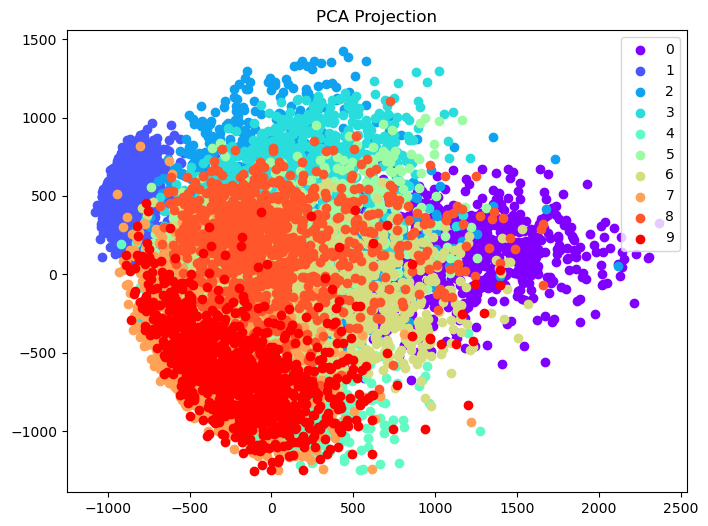

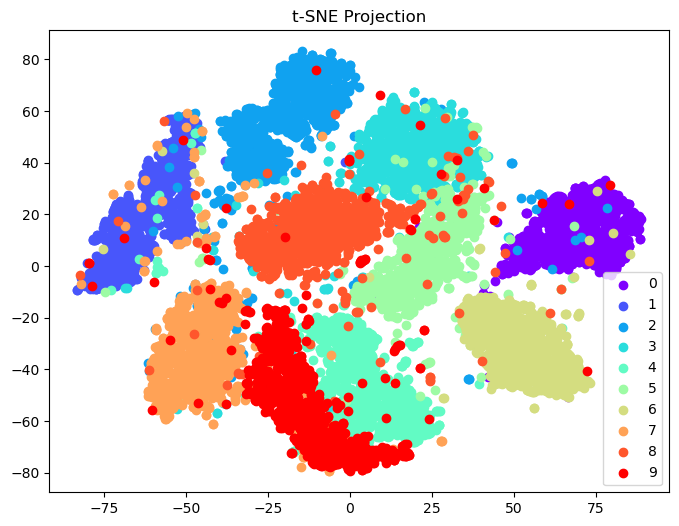

In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load the data from the pickle file
with open('mnist_small.pkl', 'rb') as file:
    data = pickle.load(file)

# Extract feature matrix (X) and labels (Y) from the loaded data
X = data['X']
Y = data['Y']

# Step 1: Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 2: Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Visualize the results using Matplotlib
def plot_data(X_projected, title):
    # Create a new figure with a specified size
    plt.figure(figsize=(8, 6))
    
    # Get unique class labels
    classes = np.unique(Y)
    
    # Generate colors for each class using the 'rainbow' colormap
    colors = plt.cm.rainbow(np.linspace(0, 1, len(classes)))

    # Plot data points for each class with a different color
    for i, class_label in enumerate(classes):
        indices = np.where(Y == class_label)[0]
        plt.scatter(X_projected[indices, 0], X_projected[indices, 1], color=colors[i], label=str(class_label))

    # Set plot title, add legend, and display the plot
    plt.title(title)
    plt.legend()
    plt.show()

# Plot PCA results
plot_data(X_pca, 'PCA Projection')

# Plot t-SNE results
plot_data(X_tsne, 't-SNE Projection')
